![](https://upload.wikimedia.org/wikipedia/commons/thumb/6/69/Airbnb_Logo_B%C3%A9lo.svg/2560px-Airbnb_Logo_B%C3%A9lo.svg.png)

# A/B Test like a pro with Airbnb 

[Airbnb](https://www.airbnb.com/) is one of most famous startup for using AB tests on almost everything they do. Indeed 1% improvement in conversions can lead to hundreds of thousands dollars in additional revenu for them and their host who are using their platform. 

During the olympics, the Data and Design team were hesitating between two background images for the website that you can see below:

## Feature A 

![](https://essentials-assets.s3.eu-west-3.amazonaws.com/M03-Python_programming_and_statistics/D02-A_B_testing_and_web_analytics/airbnb_feature_A.png)

## Feature B 

![](https://essentials-assets.s3.eu-west-3.amazonaws.com/M03-Python_programming_and_statistics/D02-A_B_testing_and_web_analytics/airbnb_feature_B.png)

Now Airbnb performed an A/B test, a random sample of their users got to see the website with feature A and another part got to see feature B. 

The results are listed in `airbnb_cover_test.xlsx`. Perform an hypothesis test proving that one feature is really better than the other one. 

## Step 1 - Import Libraries 

For this project, we will be using: 

* `pandas as pd`
* `numpy as np`
* `seaborn as sns`
* `matplotlib.pyplot as plt`


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

## Step 2 - Import dataset 

As stated above, we need to import `airbnb_cover_test.xlsx` that holds the results of our A/B test 

In [2]:
df = pd.read_excel("airbnb_cover_test.xlsx")
df

,Feature,Converted
0,B,0
1,B,0
2,B,0
3,B,0
4,B,0
...,...,...
14995,A,0
14996,B,0
14997,B,0
14998,B,0


## Step 3 - EDA 

Now, let's do a little bit of Exploratory Data Analysis. Let's first see the proportion of conversion for Feature A as well as Feature B 

In [3]:
df.groupby("Feature").mean()

,Converted
Feature,
A,0.088604
B,0.096856


Then visualize both feature using `seaborn` and `catplot`

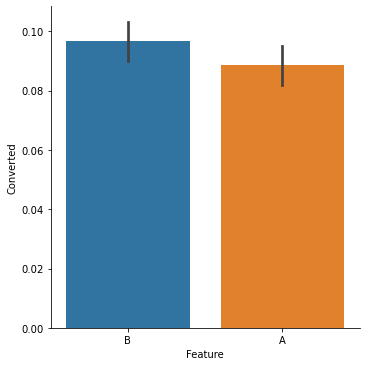

In [4]:
sns.catplot(x="Feature", y="Converted", data=df, kind="bar", ci=95)

## Step 4 - Test 

Now we need to seperate both features into two different DataFrames. Try to do that using masks

In [5]:
feature_A = df[df["Feature"] == "A"]
feature_B = df[df["Feature"] == "B"]

Once you separated your variable, you can apply the following $Z-score$ formula: 

$$Z-Score = \frac{\mu_B - \mu_A}{\sqrt{\frac{\sigma_B^2}{n_B}+ \frac{\sigma_A^2}{n_A}}}$$

In [13]:
mean_a = feature_A["Converted"].mean()
mean_b = feature_B["Converted"].mean()

std_a = feature_A["Converted"].std()
std_b = feature_B["Converted"].std()

n_a = len(feature_A)
n_b = len(feature_B)

z_score = (mean_b - mean_a) / np.sqrt(std_a**2/n_a + std_b**2/n_b)
z_score

1.7422031572082017

## Step 5 - Set $\alpha$

Let's now set $\alpha$, after checking with Airbnb's team, they've settled for 95% confidence level

In [9]:
alpha=0.05

## Step 6 - Compare p-value to $\alpha$ 

Finally, we need to compare our p-value to $\alpha$, to do so, we'll be using `ztest` from `statsmodels`: 

* [`ztest`](https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.ztest.html)

In [10]:
from statsmodels.stats.weightstats import ztest

z_score, p_value = ztest(feature_B["Converted"], feature_A["Converted"], alternative='larger', value=0)

print("Z_score value is: {}".format(z_score))
print("p-value is: {}".format(p_value))

if p_value < alpha:
    print("We can reject the Null Hypothesis")
else:
    print("We can't reject the Null hypothesis")

Z_score value is: 1.7421474690560714
p-value is: 0.04074132158780181
We can reject the Null Hypothesis


## Step 7 (Optional) - Visualize probability

Finally, one cool thing could be to visualize your Z-test! One thing that we could use is `matplotlib.pyplot` library with `seaborn`. Check out this code and try to understand the results. 

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


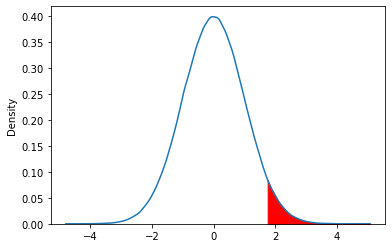

In [11]:
### Visualize area under curve
import seaborn as sns 

# Displot from seaborn gives us a distribution from what is inside the parenthesis
# np.random.normal simulates a normal distribution 
# hist=None simply stats that we don't want a histogram
ax = sns.distplot(np.random.normal(0, 1, size=1000000), hist=None) 

# This is a mask that will let us filter only the values beyond z-score
mask = ax.lines[0].get_xydata()[:, 0] > z_score ## Only modify the operator sign (<, >) depending on your problem

# This will get the coordinates of all the data points beyon z-score
x_area_under_curve = ax.lines[0].get_xydata()[:, 0][mask]
y_area_under_curve = ax.lines[0].get_xydata()[:, 1][mask]

# We finally fill the area with red
ax.fill_between(x_area_under_curve, y_area_under_curve, color="red")
plt.show()